In [64]:
library(ncdf4) # package for netcdf manipulation
library(raster) # package for raster manipulation
library(rgdal) # package for geospatial analysis
library(ggplot2) # package for plotting

In [65]:
nc_data <- nc_open('UKCP18/ukcp-other/extremal-dependence-data/tasmax_rcp85_land-rcm_uk_12km-rll_01_day_19801201-19901130.nc')

In [66]:
lon <- ncvar_get(nc_data, "grid_longitude")
lat <- ncvar_get(nc_data, "grid_latitude", verbose = F)
t <- ncvar_get(nc_data, "time")
#tasmaxt <- ncvar_get(nc_data, "tasmax")

head(lon) # look at the first few entries in the longitude vector

[1] 341.745 341.855 341.965 342.075 342.185 342.295

In [67]:
head(lat)

[1] -0.9349995 -0.8249989 -0.7149982 -0.6049995 -0.4949989 -0.3849983

In [72]:
print(lon,lat)

  [1] 342 342 342 342 342 342 342 343 343 343 343 343 343 343 343 343 344 344
 [19] 344 344 344 344 344 344 344 344 345 345 345 345 345 345 345 345 345 346
 [37] 346 346 346 346 346 346 346 346 347 347 347 347 347 347 347 347 347 348
 [55] 348 348 348 348 348 348 348 348 349 349 349 349 349 349 349 349 349 350
 [73] 350 350 350 350 350 350 350 350 351 351 351 351 351 351 351 351 351 352
 [91] 352 352 352 352 352 352 352 352 353 353 353 353 353 353 353 353 353 354


In [5]:
tasmax.array <- ncvar_get(nc_data, "tasmax") # store the data in a 3-dimensional array
dim(tasmax.array) 

[1]  108  128 3600

In [7]:
nc_close(nc_data) 

In [8]:
tasmax.array[tasmax.array == fillvalue$value] <- NA

In [9]:
tasmax.slice <- tasmax.array[, , 1] 

In [10]:
dim(tasmax.slice)

[1] 108 128

In [53]:
r <- raster(t(tasmax.slice), xmn=min(lon), xmx=max(lon), ymn=min(lat), ymx=max(lat), crs=CRS("+proj=longlat +ellps=WGS84 +datum=WGS84"))

In [54]:
r <- flip(r, direction='y')

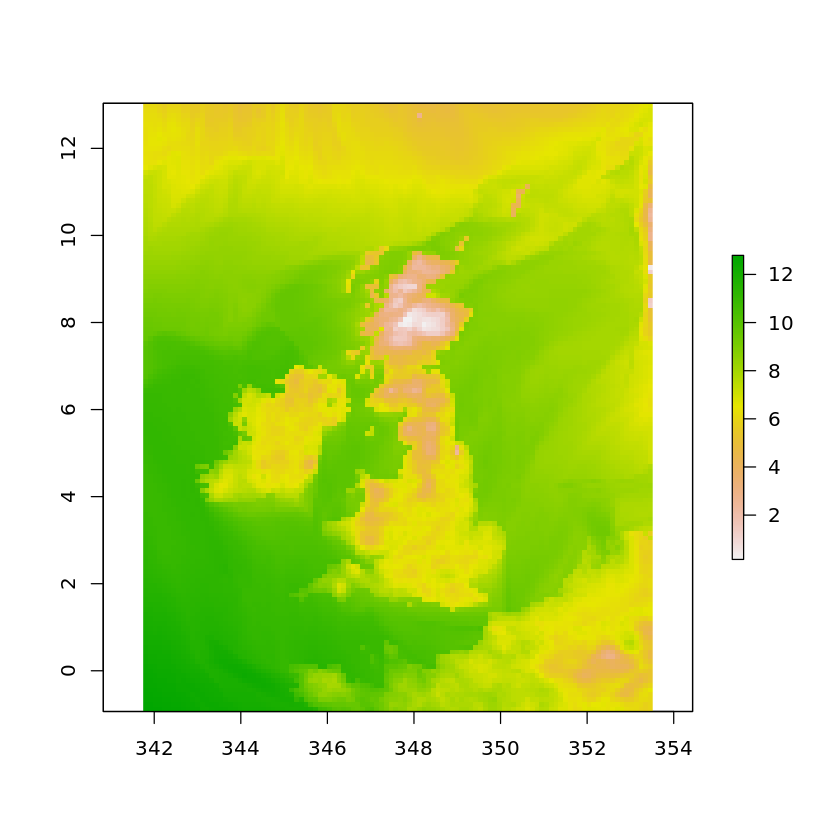

In [55]:
plot(r)


In [21]:
r_brick <- brick(tasmax.array, xmn=min(lat), xmx=max(lat), ymn=min(lon), ymx=max(lon), crs=CRS("+proj=longlat +ellps=WGS84 +datum=WGS84"))

# note that you may have to play around with the transpose (the t() function) and flip() before the data are oriented correctly. In this example, the netcdf file recorded latitude on the X and longitude on the Y, so both a transpose and a flip in the y direction were required.
r_brick <- flip(t(r_brick), direction='y')

In [42]:
head(r_brick)

layer.1,layer.2,layer.3,layer.4,layer.5,layer.6,layer.7,layer.8,layer.9,layer.10,⋯,layer.3591,layer.3592,layer.3593,layer.3594,layer.3595,layer.3596,layer.3597,layer.3598,layer.3599,layer.3600
6.088769,6.306055,7.810449,9.453028,10.036036,7.576807,5.269433,5.013086,5.323389,5.467432,⋯,9.035303,9.809717,11.44595,11.96597,7.592187,7.278955,6.928125,7.053857,7.077295,7.551416
6.077783,6.378320,7.774805,9.414209,10.029444,7.613672,5.269189,5.067041,5.398828,5.491601,⋯,9.056299,9.698389,11.48208,11.99795,7.607812,7.369531,7.039209,7.042871,7.094629,7.605371
6.080225,6.422998,7.721826,9.392481,10.006739,7.633203,5.199365,5.030420,5.473047,5.379541,⋯,9.092432,9.669092,11.50845,12.04336,7.633935,7.411279,7.279932,7.204492,7.089502,7.442041
5.865625,6.395898,7.681299,9.365870,9.981592,7.642969,5.101221,4.936426,5.398340,5.238183,⋯,9.132959,9.679346,11.56362,12.07217,7.649072,7.401758,7.284326,7.207910,7.177392,7.382471
5.679101,6.282861,7.658838,9.319971,9.950098,7.664209,4.952051,4.891260,5.327295,5.038476,⋯,9.153467,9.700342,11.59439,12.09170,7.652978,7.326074,7.320459,6.595850,7.148340,7.247217
5.918603,6.329980,7.634668,9.298731,9.911280,7.690576,5.176416,4.872949,5.244775,4.945215,⋯,9.150293,9.707666,11.56021,12.11196,7.667139,7.266016,7.337305,6.629785,7.106836,7.306055
5.941308,6.400049,7.481348,9.270166,9.880762,7.704248,5.254053,4.903467,5.140527,4.905176,⋯,9.141748,9.717188,11.54653,12.13613,7.636377,7.292383,7.322900,6.918848,7.106348,7.336572
5.937891,6.365137,7.464014,9.186182,9.857569,7.719873,5.229883,4.962060,5.125879,5.123193,⋯,9.141748,9.727442,11.52529,12.14224,7.648828,7.340234,7.323389,6.943262,7.087305,7.216943
5.674707,6.403223,7.325342,8.812403,9.834620,7.770410,5.213037,4.971338,5.218164,5.207666,⋯,9.166162,9.738184,11.51626,12.14248,7.663476,7.414941,7.266260,6.881250,6.888574,7.187158
5.704248,6.397851,7.293603,8.414698,9.817774,7.814600,5.205225,4.955957,5.184473,5.142236,⋯,9.188868,9.739405,11.46621,12.09805,7.677881,7.455957,7.128808,6.800928,6.741113,7.133203


In [57]:
toolik_lon <- -0.934999465942383
toolik_lat <- 341.744995117188
toolik_series <- extract(r_brick, SpatialPoints(cbind(toolik_lon,toolik_lat)), method='simple')

Warning message:
“Removed 3600 row(s) containing missing values (geom_path).”


<ScaleContinuousPosition>
 Range:  
 Limits:    1 -- 3.6e+03

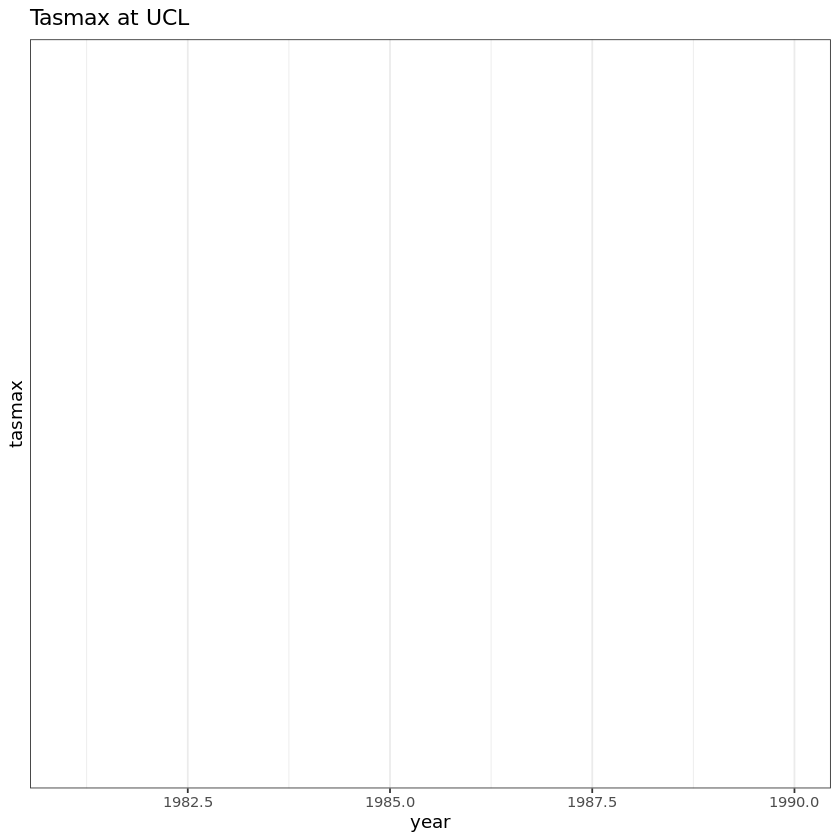

In [62]:
toolik_df <- data.frame(year= seq(from=1981, to=1990, by=1.0), tasmax=t(toolik_series))
ggplot(data=toolik_df, aes(x=year, y=tasmax, group=2)) +
  geom_line() + # make this a line plot
  ggtitle("Tasmax at UCL") +     # Set title
  theme_bw() # use the black and white theme
scale_x_continuous(limits = c(1, 3600))